Mengimport Library
Untuk memulai proyek klasifikasi penyakit mata, beberapa library yang digunakan adalah:

import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Melakukan Preprocessin data

Pada tahap ini, dilakukan proses membaca dataset, mengubah gambar menjadi grayscale, meresize ke ukuran 48x48 piksel, dan menyimpannya dalam format CSV.

In [3]:
dataPath = 'D:\\Kecerdasan Buatan\\Deep Learning\\Tugas2\\klasifikasi-penyakit-mata\\dataset'

data = []
labels = []

for category in os.listdir(dataPath):
    category_path = os.path.join(dataPath, category)
    
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # CV KE GRAYSCALE
            
            if image is not None:
                image = cv2.resize(image, (48, 48))  # Resize ke 48x48
                
                data.append(image.flatten())
                
                labels.append(category)

df = pd.DataFrame(data)
df['label'] = labels  

csv_path = 'dataset_grayscale_1337.csv'
df.to_csv(csv_path, index=False) 
  
print(f"Data tersimpan di :  {csv_path}")

Data tersimpan di :  dataset_grayscale_1337.csv


Membaca Dataset yang Telah Diproses
Dataset disimpan dalam bentuk file CSV. Pada langkah ini:
1. Dataset dibaca kembali.
2. Kolom label dipisahkan dari data lainnya.
3. Mapping label dilakukan untuk memberikan nilai numerik pada setiap kategori penyakit.

In [12]:

df = pd.read_csv('dataset_grayscale_1337.csv')


X = df.drop('label', axis=1).values

label_mapping = {
    'cataract': 0,
    'diabetic_retinopathy': 1,
    'glaucoma': 2,
    'normal': 3
}
y = df['label'].map(label_mapping).values



Membagi Dataset Menjadi Training dan Testing
Dataset dibagi menjadi dua bagian, yaitu data latih dan data uji dengan rasio 80:20 menggunakan fungsi `train_test_split` dari scikit-learn.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Membuat Model Random Forest Classifier
Pada langkah ini, model Random Forest dibuat dengan parameter tertentu dan kemudian dilatih menggunakan data latih.

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluasi Model
Setelah model dilatih, evaluasi dilakukan pada data uji menggunakan metrik seperti confusion matrix dan akurasi.

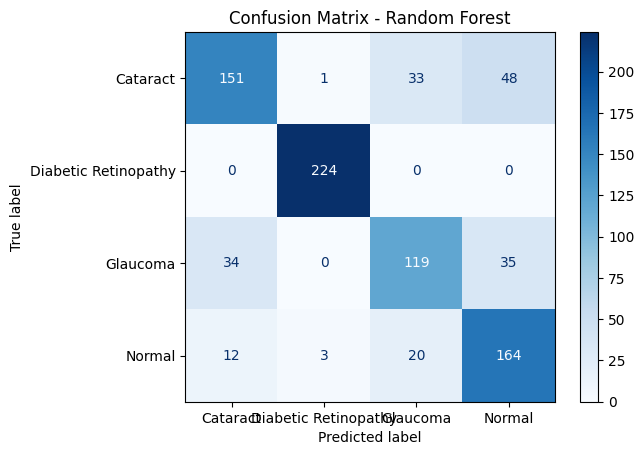

Test Accuracy: 0.7796208530805687

Classification Report:
                      precision    recall  f1-score   support

            Cataract       0.77      0.65      0.70       233
Diabetic Retinopathy       0.98      1.00      0.99       224
            Glaucoma       0.69      0.63      0.66       188
              Normal       0.66      0.82      0.74       199

            accuracy                           0.78       844
           macro avg       0.78      0.78      0.77       844
        weighted avg       0.78      0.78      0.78       844



In [15]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal'])
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print(f"Test Accuracy: {accuracy}\n")
print("Classification Report:")
print(classification_rep)

Visualisasi Salah Satu Pohon dalam Random Forest
Dari model Random Forest yang terdiri dari beberapa pohon, salah satu pohon dipilih untuk divisualisasikan.

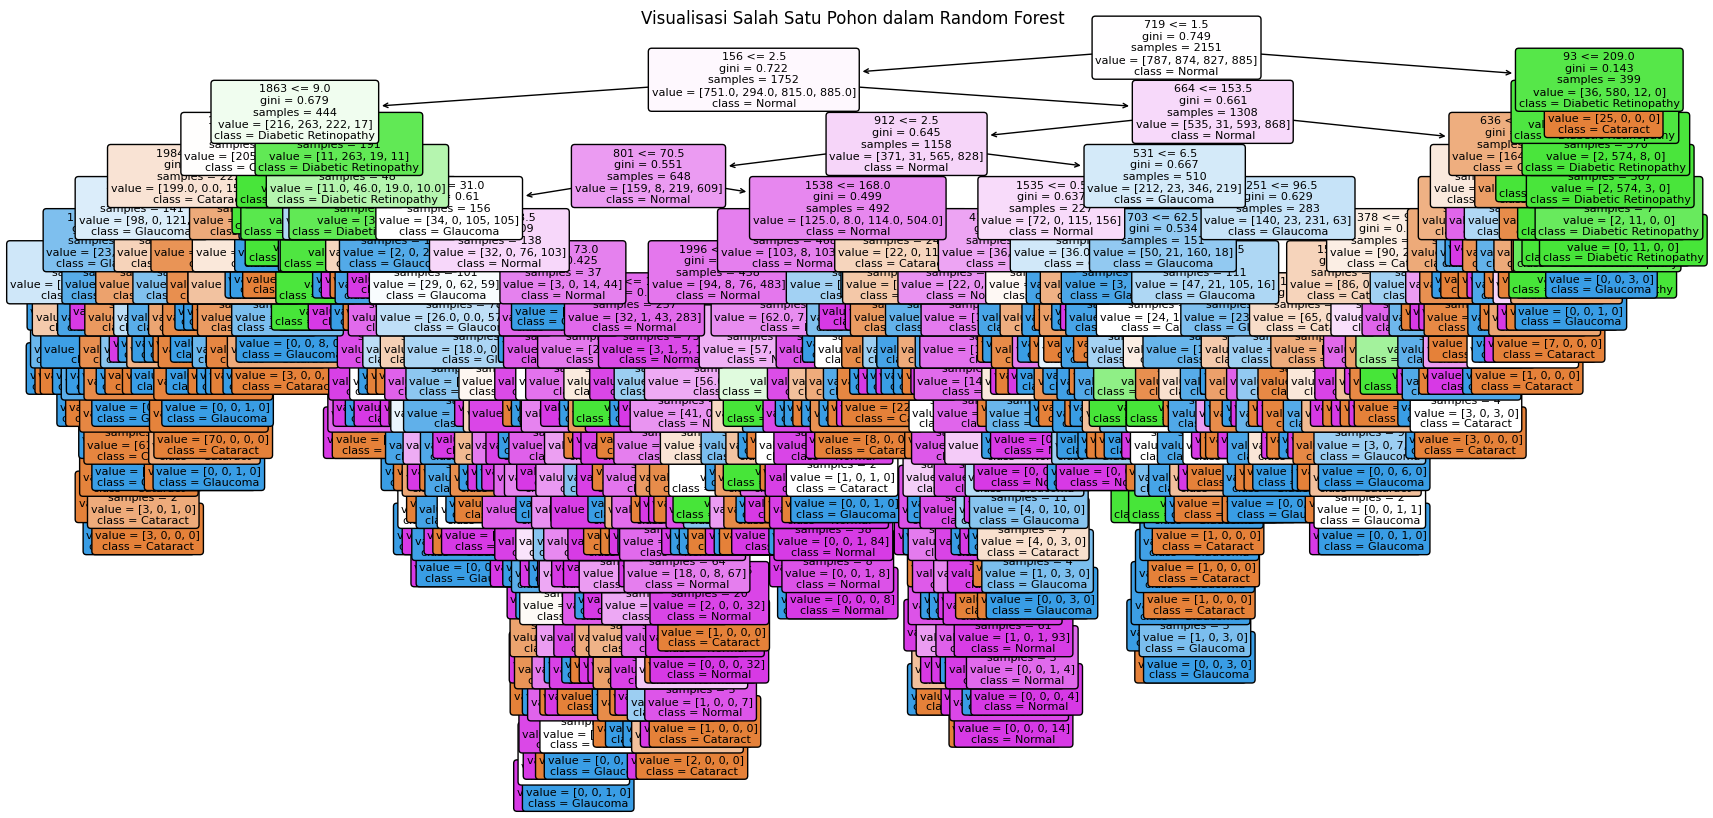

In [16]:
chosen_tree = model.estimators_[0]  # Memilih pohon pertama

plt.figure(figsize=(20, 10))
plot_tree(
    chosen_tree,
    feature_names=df.drop('label', axis=1).columns,
    class_names=['Cataract', 'Diabetic Retinopathy', 'Glaucoma', 'Normal'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Visualisasi Salah Satu Pohon dalam Random Forest")
plt.show()